In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from scipy import stats

In [2]:
race_df = pd.read_csv("nhgis0010_ds239_20185_zcta.csv", header = 0)
race_df["Zip"] = race_df["GISJOIN"].str.slice(-5)
race_df.set_index("Zip", inplace=True)
race_df.describe()

,REGIONA,DIVISIONA,STATEA,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,CONCITA,AIANHHA,...,AJWVM012,AJWVM013,AJWVM014,AJWVM015,AJWVM016,AJWVM017,AJWVM018,AJWVM019,AJWVM020,AJWVM021
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33120.000000,33120.000000,33120.000000,33120.00000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.00000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,225.701389,202.895984,36.075966,26.29686,18.517784,15.765942,130.076510,54.489191,36.476147,39.90788
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,352.530653,337.329277,76.564511,48.67069,23.970088,13.451809,262.397126,98.016156,62.712460,76.18991
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,2.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,1.000000,1.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.000000,12.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000,11.00000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.000000,52.000000,12.000000,12.00000,12.000000,12.000000,15.000000,12.000000,12.000000,12.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,284.000000,244.000000,21.000000,19.00000,18.000000,18.000000,119.000000,49.000000,26.000000,26.00000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3456.000000,3435.000000,1479.000000,797.00000,1072.000000,573.000000,3254.000000,1916.000000,1239.000000,1387.00000


In [3]:
excluded_prefixes = ('962',
'963',
'964',
'965',
'966',
'090',
'091',
'092',
'093',
'094',
'095',
'096',
'097',
'098',
'006',
'007',
'008',
'009')

race_df = race_df[~race_df.index.str.startswith(excluded_prefixes)]
race_dff = race_df[race_df["AJWVE001"] != 0]
race_dff.describe()

,REGIONA,DIVISIONA,STATEA,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,CONCITA,AIANHHA,...,AJWVM012,AJWVM013,AJWVM014,AJWVM015,AJWVM016,AJWVM017,AJWVM018,AJWVM019,AJWVM020,AJWVM021
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32670.000000,32670.000000,32670.000000,32670.000000,32670.000000,32670.000000,32670.000000,32670.000000,32670.000000,32670.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,225.789256,201.728252,34.576278,26.302510,18.483961,15.767003,129.205326,53.804163,36.517019,39.116437
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,351.066314,334.456215,69.058288,48.716996,23.937283,13.463306,260.874890,95.207313,62.836288,72.345047
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.000000,12.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.000000,53.000000,12.000000,12.000000,12.000000,12.000000,16.000000,13.000000,12.000000,12.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,284.000000,243.000000,21.000000,19.000000,18.000000,18.000000,119.000000,49.000000,26.000000,26.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3456.000000,3435.000000,1479.000000,797.000000,1072.000000,573.000000,3254.000000,1916.000000,1239.000000,1387.000000


In [4]:
race_dff["Min Share Excl B"] = 100 * (1 - (race_dff["AJWVE003"] + race_dff["AJWVE004"]) / race_dff["AJWVE001"])
race_dff["Min Share"] = 100 * (1 - (race_dff["AJWVE003"] / race_dff["AJWVE001"]))
race_dff["Black Share"] = 100 * (race_dff["AJWVE004"] + race_dff["AJWVE014"]) / race_dff["AJWVE001"]
race_dff["Total Pop"] = race_dff["AJWVE001"]
fairlie_df = race_dff[["Min Share Excl B", "Min Share", "Black Share", "Total Pop"]]
fairlie_df.describe()

C:\Users\hthog\AppData\Local\Temp\ipykernel_11324\4256292902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_dff["Min Share Excl B"] = 100 * (1 - (race_dff["AJWVE003"] + race_dff["AJWVE004"]) / race_dff["AJWVE001"])
C:\Users\hthog\AppData\Local\Temp\ipykernel_11324\4256292902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_dff["Min Share"] = 100 * (1 - (race_dff["AJWVE003"] / race_dff["AJWVE001"]))
C:\Users\hthog\AppData\Local\Temp\ipykernel_11324\4256292902.py:3: SettingWithCopyWarning: 


,Min Share Excl B,Min Share,Black Share,Total Pop
count,32670.000000,32670.000000,32670.000000,32670.000000
mean,15.343072,22.889003,7.709350,9883.366299
std,20.187150,25.400303,15.862218,14600.379989
min,0.000000,0.000000,0.000000,1.000000
25%,2.976190,4.222356,0.000000,736.000000
50%,7.453416,12.291628,1.012293,2856.000000
75%,18.813795,33.688326,6.664768,13427.000000
max,100.000000,100.000000,100.000000,122814.000000


In [5]:
df_farms_1 = pd.read_csv("Farms 1.csv")
df_farms_1["Zip Code"] = df_farms_1["Zip Code"].astype(str).str.zfill(5)
df_farms_1['Value'] = pd.to_numeric(df_farms_1['Value'].str.replace(',', ''), errors='coerce')
df_farms_1.rename(columns={'Value': 'Num Farms'}, inplace=True)
grouped_df = df_farms_1.groupby('Zip Code')['Num Farms'].sum().reset_index()
grouped_df.set_index('Zip Code', inplace=True)

In [6]:
df_farms_2 = pd.read_csv("Farms 2.csv")
df_farms_2["Zip Code"] = df_farms_2["Zip Code"].astype(str).str.zfill(5)
df_farms_2['Value'] = pd.to_numeric(df_farms_2['Value'].str.replace(',', ''), errors='coerce')
df_farms_2.rename(columns={'Value': 'Num Farms'}, inplace=True)
grouped_df_2 = df_farms_2.groupby('Zip Code')['Num Farms'].sum().reset_index()
grouped_df_2.set_index('Zip Code', inplace=True)

In [7]:
df_farms = grouped_df.add(grouped_df_2, fill_value=0)

In [8]:
cbp_df = pd.read_csv("zbp18totals.csv", encoding='latin1')
cbp_df["zip"] = cbp_df["zip"].astype(str).str.zfill(5)
cbp_df.set_index("zip", inplace=True)

In [9]:
master_df = pd.concat([df_farms, cbp_df[["est", "emp"]]], axis=1)
master_df = master_df.sort_index()
master_df.rename(columns={'est': 'Num Estabs', "emp":"CBP Emp"}, inplace=True)
master_df["Total Emp Bus"] = master_df["Num Farms"].add(master_df["Num Estabs"], fill_value=0)

In [10]:
fairlie_df[["Total Emp Bus", "CBP Emp"]] = master_df[["Total Emp Bus", "CBP Emp"]]
fairlie_df.describe()

C:\Users\hthog\AppData\Local\Temp\ipykernel_11324\1392963221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairlie_df[["Total Emp Bus", "CBP Emp"]] = master_df[["Total Emp Bus", "CBP Emp"]]
C:\Users\hthog\AppData\Local\Temp\ipykernel_11324\1392963221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairlie_df[["Total Emp Bus", "CBP Emp"]] = master_df[["Total Emp Bus", "CBP Emp"]]


,Min Share Excl B,Min Share,Black Share,Total Pop,Total Emp Bus,CBP Emp
count,32670.000000,32670.000000,32670.000000,32670.000000,31952.000000,30360.000000
mean,15.343072,22.889003,7.709350,9883.366299,305.192820,4022.338768
std,20.187150,25.400303,15.862218,14600.379989,429.453696,8309.388704
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.976190,4.222356,0.000000,736.000000,42.000000,96.000000
50%,7.453416,12.291628,1.012293,2856.000000,125.000000,580.000000
75%,18.813795,33.688326,6.664768,13427.000000,399.000000,4227.000000
max,100.000000,100.000000,100.000000,122814.000000,7252.000000,185059.000000


In [11]:
def weighted_average(df, values_col, weights_col):
    # Element-wise multiplication, ignoring NaNs
    weighted_values = df[values_col] * df[weights_col]
    
    # Sum of weighted values and weights, ignoring NaNs
    sum_weighted_values = weighted_values.sum(skipna=True)
    sum_weights = df[weights_col].sum(skipna=True)
    
    # Calculate weighted average, returning NaN if not computable
    if sum_weights == 0:
        return np.nan
    else:
        return sum_weighted_values / sum_weights

In [12]:
weighted_average(fairlie_df, "Min Share", "Total Pop")

38.934307563604015

CBP Emp contains four observations with values of 0. This results in a higher N, but ultimately leads to the same results as in Fairlie's paper due to this column being the demoninator.

In [13]:
county_df = pd.read_csv("ZIP-COUNTY-FIPS_2017-06.csv")
county_df["ZIP"] = county_df["ZIP"].astype(str).str.zfill(5)
county_df["STCOUNTYFP"] = county_df["STCOUNTYFP"].astype(str).str.zfill(5)
county_df_grouped = county_df.groupby('ZIP')['STCOUNTYFP'].agg(list).reset_index()
county_df_grouped.set_index('ZIP', inplace=True)

In [14]:
fairlie_df["Counties"] = county_df_grouped["STCOUNTYFP"]

C:\Users\hthog\AppData\Local\Temp\ipykernel_11324\3804755906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairlie_df["Counties"] = county_df_grouped["STCOUNTYFP"]


In [15]:
emp_df = pd.read_csv("Employer Race by County.csv", header = 1)
emp_df = emp_df[["Geographic identifier code", 
                 "Geographic Area Name", 
                 "Sex code", 
                 "Meaning of Sex code", 
                 "Ethnicity code",
                 "Meaning of Ethnicity code", 
                 "Race code",
                 "Meaning of Race code",
                 "Veteran code",
                 "Meaning of Veteran code",
                 "Year",
                 "Number of employer firms"]]
emp_df["FIPS"] = emp_df["Geographic identifier code"].str.slice(-5)

In [16]:
emp_df_filtered = emp_df[emp_df["Sex code"] == 1]
emp_df_filtered = emp_df_filtered[emp_df_filtered["Ethnicity code"] == 1]
emp_df_filtered = emp_df_filtered[emp_df_filtered["Veteran code"] == 1]
emp_df_filtered["Number of employer firms"].replace("S", np.nan, inplace=True)

In [17]:
index = sorted(list(set(emp_df_filtered["FIPS"])))
columns = list(set(emp_df_filtered["Meaning of Race code"]))
owner_df = pd.DataFrame(index = index, columns = columns).fillna(0)

In [18]:
for column in owner_df.columns:
    sub_df = emp_df_filtered[emp_df_filtered["Meaning of Race code"] == column]
    sub_df.set_index("FIPS", inplace=True)
    owner_df[column] = sub_df["Number of employer firms"].astype(np.double)
owner_df["Emp Min Share"] = owner_df["Minority"] / owner_df["Total"]

In [19]:
owner_df.describe()

,Asian,Total,Nonminority,Native Hawaiian and Other Pacific Islander,White,Equally minority/nonminority,American Indian and Alaska Native,Minority,Black or African American,Emp Min Share
count,666.000000,2972.000000,2652.000000,37.000000,2667.000000,313.000000,173.000000,1041.000000,370.000000,1031.000000
mean,785.462462,2164.483513,1712.736425,95.324324,1855.201350,220.725240,75.300578,939.705091,285.440541,0.115679
std,2782.302697,7324.429619,4952.981741,161.231210,5714.036688,445.289248,107.058188,3604.659095,511.731815,0.087411
min,21.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.013952
25%,69.250000,221.000000,202.000000,31.000000,210.000000,42.000000,31.000000,63.000000,40.250000,0.058591
50%,168.500000,520.500000,475.000000,46.000000,487.000000,94.000000,44.000000,158.000000,106.000000,0.092402
75%,507.750000,1387.500000,1268.250000,82.000000,1301.500000,219.000000,79.000000,510.000000,289.750000,0.141300
max,55036.000000,228558.000000,130465.000000,884.000000,156111.000000,5282.000000,961.000000,81550.000000,4408.000000,0.679245


In [20]:
df = pd.read_csv("nhgis0011_ds239_20185_county.csv", encoding="latin1")
df["Fips"] = df["STATEA"].astype(str).str.zfill(2) + df["COUNTYA"].astype(str).str.zfill(3)
df.set_index("Fips", inplace=True)
df

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,AJWVM012,AJWVM013,AJWVM014,AJWVM015,AJWVM016,AJWVM017,AJWVM018,AJWVM019,AJWVM020,AJWVM021
Fips,,,,,,,,,,,,,,,,,,,,,
01001,G0100010,2014-2018,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,...,0,337,89,28,28,36,349,29,29,28
01003,G0100030,2014-2018,AL,NaN,NaN,Alabama,1,Baldwin County,3,NaN,...,0,686,204,123,19,28,642,345,159,328
01005,G0100050,2014-2018,AL,NaN,NaN,Alabama,1,Barbour County,5,NaN,...,0,179,50,16,20,22,175,13,13,22
01007,G0100070,2014-2018,AL,NaN,NaN,Alabama,1,Bibb County,7,NaN,...,0,70,63,22,22,22,16,32,22,32
01009,G0100090,2014-2018,AL,NaN,NaN,Alabama,1,Blount County,9,NaN,...,0,174,49,25,28,28,148,86,43,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72145,G7201450,2014-2018,PR,NaN,NaN,Puerto Rico,72,Vega Baja Municipio,145,NaN,...,331,1210,502,80,32,40,906,251,166,170
72147,G7201470,2014-2018,PR,NaN,NaN,Puerto Rico,72,Vieques Municipio,147,NaN,...,291,814,402,12,182,19,825,114,19,114
72149,G7201490,2014-2018,PR,NaN,NaN,Puerto Rico,72,Villalba Municipio,149,NaN,...,47,1026,261,25,25,25,659,897,125,908


In [21]:
df["Min Share"] = 100 * (1 - (df["AJWVE003"] / df["AJWVE001"]))
df["Total Pop"] = df["AJWVE001"]
owner_df[["Min Share", "Total Pop"]] = df[["Min Share", "Total Pop"]]
owner_df[["Min Share", "Emp Min Share"]].describe()

,Min Share,Emp Min Share
count,3140.000000,1031.000000
mean,23.512845,0.115679
std,20.187151,0.087411
min,0.000000,0.013952
25%,7.313788,0.058591
50%,16.075363,0.092402
75%,35.242960,0.141300
max,99.272232,0.679245


In [22]:
weighted_average(owner_df, "Emp Min Share", "Total Pop")

0.15103803521530715

In [23]:
weighted_average(owner_df, "Min Share", "Total Pop")

38.93492623348778

In [24]:
def calc_weighted_avg(fips_list, col_name):
    if not isinstance(fips_list, list):
        return None

    total_sum = 0
    weighted_sum = 0

    for fips in fips_list:
        if fips in owner_df.index:
            weighted_sum += owner_df.loc[fips, col_name] * owner_df.loc[fips, 'Total']
            total_sum += owner_df.loc[fips, 'Total']

    return weighted_sum / total_sum if total_sum != 0 else None

In [25]:
fairlie_df["Emp Min Share"] = 100 * fairlie_df['Counties'].apply(calc_weighted_avg, col_name="Emp Min Share")
fairlie_df.describe()

C:\Users\hthog\AppData\Local\Temp\ipykernel_11324\1853521543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairlie_df["Emp Min Share"] = 100 * fairlie_df['Counties'].apply(calc_weighted_avg, col_name="Emp Min Share")


,Min Share Excl B,Min Share,Black Share,Total Pop,Total Emp Bus,CBP Emp,Emp Min Share
count,32670.000000,32670.000000,32670.000000,32670.000000,31952.000000,30360.000000,15490.000000
mean,15.343072,22.889003,7.709350,9883.366299,305.192820,4022.338768,14.342460
std,20.187150,25.400303,15.862218,14600.379989,429.453696,8309.388704,10.330661
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.395158
25%,2.976190,4.222356,0.000000,736.000000,42.000000,96.000000,7.208246
50%,7.453416,12.291628,1.012293,2856.000000,125.000000,580.000000,11.027569
75%,18.813795,33.688326,6.664768,13427.000000,399.000000,4227.000000,18.741849
max,100.000000,100.000000,100.000000,122814.000000,7252.000000,185059.000000,67.924528


In [26]:
# List of file names
base = "C:\\Users\\hthog\\Desktop\\PPP Loan Data\\"
file_df = pd.read_csv(base + "PPP Files.csv")
file_df["Completed"] = 0
file_df

,File,Completed
0,public_150k_plus_230630.csv,0
1,public_up_to_150k_1_230630.csv,0
2,public_up_to_150k_2_230630.csv,0
3,public_up_to_150k_3_230630.csv,0
4,public_up_to_150k_4_230630.csv,0
5,public_up_to_150k_5_230630.csv,0
6,public_up_to_150k_6_230630.csv,0
7,public_up_to_150k_7_230630.csv,0
8,public_up_to_150k_8_230630.csv,0
9,public_up_to_150k_9_230630.csv,0


In [27]:
def assign_value_based_on_date(date):
    if date < pd.Timestamp('2020-04-17'):
        return '_1'
    elif date < pd.Timestamp('2020-08-09'):
        return '_2'
    else:
        return '_3'
traunches = ["_1", "_2", "_3"]

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
fairlie_df["Number of Loans_1"] = 0
fairlie_df["Total Loans Amount_1"] = 0

fairlie_df["Number of Loans_2"] = 0
fairlie_df["Total Loans Amount_2"] = 0

fairlie_df["Number of Loans_3"] = 0
fairlie_df["Total Loans Amount_3"] = 0

In [30]:
for file in file_df[file_df["Completed"] == 0]["File"]:
    file_name = base + file
    # Check if file exists
    if not os.path.exists(file_name):
        print(f"File {file_name} does not exist. Skipping...")
        continue

    print(f"Processing {file}...")
    
    # Read file row by row since cannot fit in DF
    chunk_size = 640000
    for chunk in pd.read_csv(file_name, chunksize=chunk_size, usecols=['NonProfit', 
                                                                           'BusinessType', 
                                                                           'NAICSCode', 
                                                                           'BorrowerZip', 
                                                                           'DateApproved', 
                                                                           'CurrentApprovalAmount']):
        # Filter chunk to only needed observations
        chunk = chunk[chunk["NonProfit"] != "Y"]
        chunk = chunk[~chunk["BusinessType"].isin(["gfnagngansgn",#"Sole Proprietorship",
                                                     "Independent Contractors",
                                                     "Self-Employed Individuals"])]
        chunk = chunk[~chunk["NAICSCode"].astype(str).str.startswith("99")]
        #chunk = chunk[chunk["NAICSCode"].notnull()]
        chunk.dropna(subset=["BorrowerZip"], inplace=True)

        # Edit chunk to include necessary info
        chunk["DateApproved"] = pd.to_datetime(chunk["DateApproved"])
        chunk["Traunch"] = chunk["DateApproved"].apply(assign_value_based_on_date)
        chunk["BorrowerZip"] = chunk["BorrowerZip"].astype(str).str[:5]
            
        # Aggregate Data
        grouped = chunk.groupby(['BorrowerZip', 'Traunch']).agg({
                'CurrentApprovalAmount': 'sum',
                'Traunch': 'size'  # Count of loans
            })

        # Update master_df
        for (zip_, traunch), row in grouped.iterrows():
            if zip_ in fairlie_df.index:
                fairlie_df.loc[zip_, f"Number of Loans{traunch}"] += row['Traunch']  # Update the number of loans
                #fairlie_df.loc[zip_, f"Total Loans Amount{traunch}"] += row['InitialApprovalAmount']
            else:
                continue
    print(f"Updated master DataFrame with data from {file}.")

Processing public_150k_plus_230630.csv...
Updated master DataFrame with data from public_150k_plus_230630.csv.
Processing public_up_to_150k_1_230630.csv...
Updated master DataFrame with data from public_up_to_150k_1_230630.csv.
Processing public_up_to_150k_2_230630.csv...
Updated master DataFrame with data from public_up_to_150k_2_230630.csv.
Processing public_up_to_150k_3_230630.csv...
Updated master DataFrame with data from public_up_to_150k_3_230630.csv.
Processing public_up_to_150k_4_230630.csv...
Updated master DataFrame with data from public_up_to_150k_4_230630.csv.
Processing public_up_to_150k_5_230630.csv...
Updated master DataFrame with data from public_up_to_150k_5_230630.csv.
Processing public_up_to_150k_6_230630.csv...
Updated master DataFrame with data from public_up_to_150k_6_230630.csv.
Processing public_up_to_150k_7_230630.csv...
Updated master DataFrame with data from public_up_to_150k_7_230630.csv.
Processing public_up_to_150k_8_230630.csv...
Updated master DataFrame 

In [31]:
fairlie_df["Total Loans"] = fairlie_df["Number of Loans_1"].add(fairlie_df["Number of Loans_2"], fill_value = 0)
fairlie_df.describe()

,Min Share Excl B,Min Share,Black Share,Total Pop,Total Emp Bus,CBP Emp,Emp Min Share,Number of Loans_1,Total Loans Amount_1,Number of Loans_2,Total Loans Amount_2,Number of Loans_3,Total Loans Amount_3,Total Loans
count,32670.000000,32670.000000,32670.000000,32670.000000,31952.000000,30360.000000,15490.000000,32670.000000,32670.0,32670.000000,32670.0,32670.000000,32670.0,32670.000000
mean,15.343072,22.889003,7.709350,9883.366299,305.192820,4022.338768,14.342460,45.849617,0.0,90.764524,0.0,148.095531,0.0,136.614141
std,20.187150,25.400303,15.862218,14600.379989,429.453696,8309.388704,10.330661,79.770008,0.0,171.978432,0.0,275.677316,0.0,238.362553
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.395158,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,2.976190,4.222356,0.000000,736.000000,42.000000,96.000000,7.208246,2.000000,0.0,4.000000,0.0,11.000000,0.0,7.000000
50%,7.453416,12.291628,1.012293,2856.000000,125.000000,580.000000,11.027569,12.000000,0.0,18.000000,0.0,43.000000,0.0,30.000000
75%,18.813795,33.688326,6.664768,13427.000000,399.000000,4227.000000,18.741849,53.000000,0.0,96.000000,0.0,169.000000,0.0,160.000000
max,100.000000,100.000000,100.000000,122814.000000,7252.000000,185059.000000,67.924528,1128.000000,0.0,3542.000000,0.0,6801.000000,0.0,4573.000000


In [32]:
fairlie_df[["Number of Loans_1",
           "Number of Loans_2",
           "Number of Loans_3",
           "Total Loans"]] = fairlie_df[["Number of Loans_1",
                                         "Number of Loans_2",
                                         "Number of Loans_3",
                                         "Total Loans"]].fillna(0)
fairlie_df.describe()

,Min Share Excl B,Min Share,Black Share,Total Pop,Total Emp Bus,CBP Emp,Emp Min Share,Number of Loans_1,Total Loans Amount_1,Number of Loans_2,Total Loans Amount_2,Number of Loans_3,Total Loans Amount_3,Total Loans
count,32670.000000,32670.000000,32670.000000,32670.000000,31952.000000,30360.000000,15490.000000,32670.000000,32670.0,32670.000000,32670.0,32670.000000,32670.0,32670.000000
mean,15.343072,22.889003,7.709350,9883.366299,305.192820,4022.338768,14.342460,45.849617,0.0,90.764524,0.0,148.095531,0.0,136.614141
std,20.187150,25.400303,15.862218,14600.379989,429.453696,8309.388704,10.330661,79.770008,0.0,171.978432,0.0,275.677316,0.0,238.362553
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.395158,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,2.976190,4.222356,0.000000,736.000000,42.000000,96.000000,7.208246,2.000000,0.0,4.000000,0.0,11.000000,0.0,7.000000
50%,7.453416,12.291628,1.012293,2856.000000,125.000000,580.000000,11.027569,12.000000,0.0,18.000000,0.0,43.000000,0.0,30.000000
75%,18.813795,33.688326,6.664768,13427.000000,399.000000,4227.000000,18.741849,53.000000,0.0,96.000000,0.0,169.000000,0.0,160.000000
max,100.000000,100.000000,100.000000,122814.000000,7252.000000,185059.000000,67.924528,1128.000000,0.0,3542.000000,0.0,6801.000000,0.0,4573.000000


In [33]:
fairlie_df["Loans per Emp Bus"] = fairlie_df["Total Loans"] / fairlie_df["Total Emp Bus"]
fairlie_df["Loans per Emp Bus_1"] = fairlie_df["Number of Loans_1"] / fairlie_df["Total Emp Bus"]
fairlie_df["Loans per Emp Bus_2"] = fairlie_df["Number of Loans_2"] / fairlie_df["Total Emp Bus"]
fairlie_df["Loans per Emp Bus_3"] = fairlie_df["Number of Loans_3"] / fairlie_df["Total Emp Bus"]
fairlie_df.replace([np.inf, -np.inf], np.nan, inplace=True)
fairlie_df.describe()

,Min Share Excl B,Min Share,Black Share,Total Pop,Total Emp Bus,CBP Emp,Emp Min Share,Number of Loans_1,Total Loans Amount_1,Number of Loans_2,Total Loans Amount_2,Number of Loans_3,Total Loans Amount_3,Total Loans,Loans per Emp Bus,Loans per Emp Bus_1,Loans per Emp Bus_2,Loans per Emp Bus_3
count,32670.000000,32670.000000,32670.000000,32670.000000,31952.000000,30360.000000,15490.000000,32670.000000,32670.0,32670.000000,32670.0,32670.000000,32670.0,32670.000000,31952.000000,31952.000000,31952.000000,31952.000000
mean,15.343072,22.889003,7.709350,9883.366299,305.192820,4022.338768,14.342460,45.849617,0.0,90.764524,0.0,148.095531,0.0,136.614141,0.346175,0.123491,0.222684,0.461948
std,20.187150,25.400303,15.862218,14600.379989,429.453696,8309.388704,10.330661,79.770008,0.0,171.978432,0.0,275.677316,0.0,238.362553,0.224332,0.103425,0.178037,0.570804
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.395158,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.976190,4.222356,0.000000,736.000000,42.000000,96.000000,7.208246,2.000000,0.0,4.000000,0.0,11.000000,0.0,7.000000,0.181818,0.053191,0.101010,0.228070
50%,7.453416,12.291628,1.012293,2856.000000,125.000000,580.000000,11.027569,12.000000,0.0,18.000000,0.0,43.000000,0.0,30.000000,0.324675,0.108343,0.184945,0.360634
75%,18.813795,33.688326,6.664768,13427.000000,399.000000,4227.000000,18.741849,53.000000,0.0,96.000000,0.0,169.000000,0.0,160.000000,0.492067,0.175000,0.310881,0.530623
max,100.000000,100.000000,100.000000,122814.000000,7252.000000,185059.000000,67.924528,1128.000000,0.0,3542.000000,0.0,6801.000000,0.0,4573.000000,6.000000,3.000000,6.000000,17.639706


In [34]:
weighted_average(fairlie_df, "Loans per Emp Bus", "Total Pop")

0.486208686227326

In [35]:
def get_range(val):
    if val < 150000:
        return val
    elif val < 350000:
        return 250000
    elif val < 1000000:
        return 675000
    elif val < 2000000:
        return 1500000
    elif val < 5000000:
        return 3500000
    elif val < 10000000:
        return 7500000
    else:
        return val

In [36]:
for file in file_df[file_df["Completed"] == 0]["File"]:
    file_name = base + file
    # Check if file exists
    if not os.path.exists(file_name):
        print(f"File {file_name} does not exist. Skipping...")
        continue

    print(f"Processing {file}...")
    
    # Read file row by row since cannot fit in DF
    chunk_size = 640000
    for chunk in pd.read_csv(file_name, chunksize=chunk_size, usecols=['NonProfit', 
                                                                           'BusinessType', 
                                                                           'NAICSCode', 
                                                                           'BorrowerZip', 
                                                                           'DateApproved', 
                                                                           'CurrentApprovalAmount']):
        # Filter chunk to only needed observations
        chunk = chunk[chunk["NonProfit"] != "Y"]
        chunk = chunk[~chunk["BusinessType"].isin(["gfnagngansgn",#"Sole Proprietorship",
                                                     "Independent Contractors",
                                                     "Self-Employed Individuals"])]
        chunk = chunk[~chunk["NAICSCode"].astype(str).str.startswith(("11", "99"))]
        #chunk = chunk[chunk["NAICSCode"].notnull()]
        chunk.dropna(subset=["BorrowerZip"], inplace=True)

        # Edit chunk to include necessary info
        chunk["DateApproved"] = pd.to_datetime(chunk["DateApproved"])
        chunk["Traunch"] = chunk["DateApproved"].apply(assign_value_based_on_date)
        chunk["BorrowerZip"] = chunk["BorrowerZip"].astype(str).str[:5]
        chunk["CurrentApprovalAmount"] = chunk["CurrentApprovalAmount"].apply(get_range)
        
        # Aggregate Data
        grouped = chunk.groupby(['BorrowerZip', 'Traunch']).agg({
                'CurrentApprovalAmount': 'sum',
                'Traunch': 'size'  # Count of loans
            })

        # Update master_df
        for (zip_, traunch), row in grouped.iterrows():
            if zip_ in fairlie_df.index:
                fairlie_df.loc[zip_, f"Total Loans Amount{traunch}"] += row['CurrentApprovalAmount']
            else:
                continue
    print(f"Updated master DataFrame with data from {file}.")

Processing public_150k_plus_230630.csv...
Updated master DataFrame with data from public_150k_plus_230630.csv.
Processing public_up_to_150k_1_230630.csv...
Updated master DataFrame with data from public_up_to_150k_1_230630.csv.
Processing public_up_to_150k_2_230630.csv...
Updated master DataFrame with data from public_up_to_150k_2_230630.csv.
Processing public_up_to_150k_3_230630.csv...
Updated master DataFrame with data from public_up_to_150k_3_230630.csv.
Processing public_up_to_150k_4_230630.csv...
Updated master DataFrame with data from public_up_to_150k_4_230630.csv.
Processing public_up_to_150k_5_230630.csv...
Updated master DataFrame with data from public_up_to_150k_5_230630.csv.
Processing public_up_to_150k_6_230630.csv...
Updated master DataFrame with data from public_up_to_150k_6_230630.csv.
Processing public_up_to_150k_7_230630.csv...
Updated master DataFrame with data from public_up_to_150k_7_230630.csv.
Processing public_up_to_150k_8_230630.csv...
Updated master DataFrame 

In [37]:
fairlie_df["Total Loan Amount"] = fairlie_df["Total Loans Amount_1"].add(fairlie_df["Total Loans Amount_2"], fill_value = 0)

In [38]:
fairlie_df[["Total Loans Amount_1",
           "Total Loans Amount_2", 
           "Total Loans Amount_3",
           "Total Loan Amount"]] = fairlie_df[["Total Loans Amount_1",
           "Total Loans Amount_2",
           "Total Loans Amount_3",
           "Total Loan Amount"]].fillna(0)
fairlie_df.describe()

,Min Share Excl B,Min Share,Black Share,Total Pop,Total Emp Bus,CBP Emp,Emp Min Share,Number of Loans_1,Total Loans Amount_1,Number of Loans_2,Total Loans Amount_2,Number of Loans_3,Total Loans Amount_3,Total Loans,Loans per Emp Bus,Loans per Emp Bus_1,Loans per Emp Bus_2,Loans per Emp Bus_3,Total Loan Amount
count,32670.000000,32670.000000,32670.000000,32670.000000,31952.000000,30360.000000,15490.000000,32670.000000,3.267000e+04,32670.000000,3.267000e+04,32670.000000,3.267000e+04,32670.000000,31952.000000,31952.000000,31952.000000,31952.000000,3.267000e+04
mean,15.343072,22.889003,7.709350,9883.366299,305.192820,4022.338768,14.342460,45.849617,9.722289e+06,90.764524,5.808145e+06,148.095531,7.780655e+06,136.614141,0.346175,0.123491,0.222684,0.461948,1.553043e+07
std,20.187150,25.400303,15.862218,14600.379989,429.453696,8309.388704,10.330661,79.770008,2.202630e+07,171.978432,1.516951e+07,275.677316,1.731086e+07,238.362553,0.224332,0.103425,0.178037,0.570804,3.534184e+07
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.395158,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.976190,4.222356,0.000000,736.000000,42.000000,96.000000,7.208246,2.000000,7.377975e+04,4.000000,5.521095e+04,11.000000,1.247039e+05,7.000000,0.181818,0.053191,0.101010,0.228070,1.833776e+05
50%,7.453416,12.291628,1.012293,2856.000000,125.000000,580.000000,11.027569,12.000000,1.046915e+06,18.000000,4.698613e+05,43.000000,9.109227e+05,30.000000,0.324675,0.108343,0.184945,0.360634,1.748083e+06
75%,18.813795,33.688326,6.664768,13427.000000,399.000000,4227.000000,18.741849,53.000000,8.705101e+06,96.000000,4.646109e+06,169.000000,7.599791e+06,160.000000,0.492067,0.175000,0.310881,0.530623,1.449616e+07
max,100.000000,100.000000,100.000000,122814.000000,7252.000000,185059.000000,67.924528,1128.000000,5.326947e+08,3542.000000,6.556717e+08,6801.000000,6.072524e+08,4573.000000,6.000000,3.000000,6.000000,17.639706,1.188366e+09


In [39]:
fairlie_df["Avg Loan Amt per Emp"] = fairlie_df["Total Loan Amount"] / fairlie_df["CBP Emp"]
fairlie_df["Avg Loan Amt per Emp_1"] = fairlie_df["Total Loans Amount_1"] / fairlie_df["CBP Emp"]
fairlie_df["Avg Loan Amt per Emp_2"] = fairlie_df["Total Loans Amount_2"] / fairlie_df["CBP Emp"]
fairlie_df["Avg Loan Amt per Emp_3"] = fairlie_df["Total Loans Amount_3"] / fairlie_df["CBP Emp"]
fairlie_df.replace([np.inf, -np.inf], np.nan, inplace=True)
fairlie_df.describe()

,Min Share Excl B,Min Share,Black Share,Total Pop,Total Emp Bus,CBP Emp,Emp Min Share,Number of Loans_1,Total Loans Amount_1,Number of Loans_2,...,Total Loans,Loans per Emp Bus,Loans per Emp Bus_1,Loans per Emp Bus_2,Loans per Emp Bus_3,Total Loan Amount,Avg Loan Amt per Emp,Avg Loan Amt per Emp_1,Avg Loan Amt per Emp_2,Avg Loan Amt per Emp_3
count,32670.000000,32670.000000,32670.000000,32670.000000,31952.000000,30360.000000,15490.000000,32670.000000,3.267000e+04,32670.000000,...,32670.000000,31952.000000,31952.000000,31952.000000,31952.000000,3.267000e+04,30356.000000,30356.000000,30356.000000,30356.000000
mean,15.343072,22.889003,7.709350,9883.366299,305.192820,4022.338768,14.342460,45.849617,9.722289e+06,90.764524,...,136.614141,0.346175,0.123491,0.222684,0.461948,1.553043e+07,4888.956908,3087.872773,1801.084135,3143.867467
std,20.187150,25.400303,15.862218,14600.379989,429.453696,8309.388704,10.330661,79.770008,2.202630e+07,171.978432,...,238.362553,0.224332,0.103425,0.178037,0.570804,3.534184e+07,6538.795682,5496.498953,3110.191202,6056.693529
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.395158,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.976190,4.222356,0.000000,736.000000,42.000000,96.000000,7.208246,2.000000,7.377975e+04,4.000000,...,7.000000,0.181818,0.053191,0.101010,0.228070,1.833776e+05,2392.188707,1016.154518,551.048582,1196.578949
50%,7.453416,12.291628,1.012293,2856.000000,125.000000,580.000000,11.027569,12.000000,1.046915e+06,18.000000,...,30.000000,0.324675,0.108343,0.184945,0.360634,1.748083e+06,3938.759753,2244.992725,1181.703866,2092.086465
75%,18.813795,33.688326,6.664768,13427.000000,399.000000,4227.000000,18.741849,53.000000,8.705101e+06,96.000000,...,160.000000,0.492067,0.175000,0.310881,0.530623,1.449616e+07,5964.998447,3790.939339,2232.495406,3477.242914
max,100.000000,100.000000,100.000000,122814.000000,7252.000000,185059.000000,67.924528,1128.000000,5.326947e+08,3542.000000,...,4573.000000,6.000000,3.000000,6.000000,17.639706,1.188366e+09,504297.500000,483300.000000,218980.810000,337500.000000


In [40]:
weighted_average(fairlie_df, "Avg Loan Amt per Emp", "Total Pop")

4378.305094779205

In [41]:
stats_df = fairlie_df

In [42]:
stats_df["Avg Loan Amt per Emp_2 Adj"] = stats_df["Avg Loan Amt per Emp_2"] * 349 / 320
stats_df["Avg Loan Amt per Emp_3 Adj"] = stats_df["Avg Loan Amt per Emp_3"] * 349 / 284.5

In [43]:
region_mappings = {
    '9': 'West',
    '8': 'West',
    '59': 'West',
    '7': 'South',
    '885': 'South',
    '3': 'South',
    '40': 'South',
    '41': 'South',
    '42': 'South',
    '2': 'South',
    '197': 'South',
    '198': 'South',
    '199': 'South',
    '569': 'South',
    '5': 'Midwest',
    '6': 'Midwest',
    '4': 'Midwest',
    '0': 'Northeast',
    '1': 'Northeast',
}

# Define a function to map ZIP code to region based on the first few digits
def map_zip_to_region(zip_code):
    for i in range(len(zip_code), 0, -1):
        prefix = zip_code[:i]
        if prefix in region_mappings:
            return region_mappings[prefix]
    return None  # Return None if no match is found

# Apply the function to each ZIP code in the DataFrame index and create a new column
stats_df['Census Region'] = stats_df.index.map(map_zip_to_region)

In [44]:
def plot_binned_means(df, x_col, y_col, weight_col, color_col=None, y_limits=None):
    # Initialize the figure
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the subplot to a single row with two columns
    
    # Drop NaN values for relevant columns
    columns_to_check = [x_col, y_col, weight_col]
    if color_col is not None:
        columns_to_check.append(color_col)
    df = df.dropna(subset=columns_to_check)
    
    # Create bins for the x column
    bin_label = f'{x_col} Bin'
    df[bin_label] = pd.cut(df[x_col], bins=20)
    
    for j, measure in enumerate(['Weighted', 'Unweighted']):
        ax = axes[j]
        title  = f'Mean {y_col}'
        
        if measure == 'Weighted':
            # Calculate weighted mean for each bin
            df['Weighted'] = df[y_col] * df[weight_col]
            grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
            title += f" Weighted by {weight_col}"
        else:
            # Calculate unweighted mean for each bin
            grouped = df.groupby(bin_label)[y_col].mean().reset_index()
        
        bar_colors = 'royalblue'  # default color if not coloring bars
        
        if color_col is not None:
            # Calculate the weighted average of the color column for each bin
            df['WeightedColor'] = df[color_col] * df[weight_col]
            color_grouped = df.groupby(bin_label).apply(lambda x: x['WeightedColor'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted {color_col}')
            
            # Normalize the colors
            cmap = sns.color_palette("coolwarm", as_cmap=True)
            normed_color = (color_grouped[f'Weighted {color_col}'] - color_grouped[f'Weighted {color_col}'].min()) / (color_grouped[f'Weighted {color_col}'].max() - color_grouped[f'Weighted {color_col}'].min())
            bar_colors = cmap(normed_color)
        
        # Create bar charts
        ax.bar(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], color=bar_colors, label=f'{x_col} ({measure})')
        
        # Perform quadratic regression
        x_data = np.arange(len(grouped[bin_label]))
        y_data = grouped[grouped.columns[-1]].values
        coeffs = np.polyfit(x_data, y_data, 2)
        poly_eq = np.poly1d(coeffs)
        x_poly = np.linspace(min(x_data), max(x_data), 100)
        y_poly = poly_eq(x_poly)
        ax.plot(x_poly, y_poly, 'r-', label='Quadratic Fit', color='midnightblue', linestyle="--")
        
        ticks = ["[0, 5]", 
        "(5, 10]",
        "(10, 15]",
        "(15, 20]",
        "(20, 25]",
        "(25, 30]",
        "(30, 35]",
        "(35, 40]",
        "(40, 45]",
        "(45, 50]",
        "(50, 55]",
        "(55, 60]",
        "(60, 65]",
        "(65, 70]",
        "(70, 75]",
        "(75, 80]",
        "(80, 85]",
        "(85, 90]",
        "(90, 95]",
        "(95, 100]"]
        ax.set_xticks(x_data)
        ax.set_xticklabels(ticks, rotation=45)
        title += f' by {x_col}'
        ax.set_title(title)
        
        if y_limits:
            ax.set_ylim(y_limits[j])
            
        ax.legend()
    
    plt.tight_layout()
    plt.show()

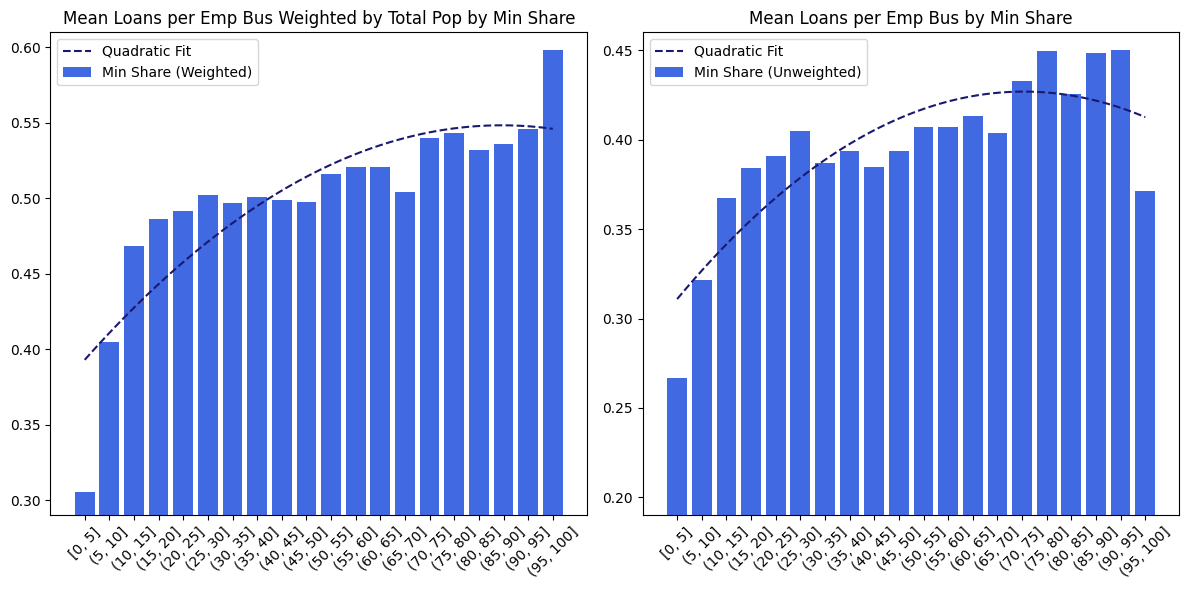

In [45]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus", "Total Pop", color_col=None, y_limits=[[0.29, 0.61], [0.19, 0.46]])

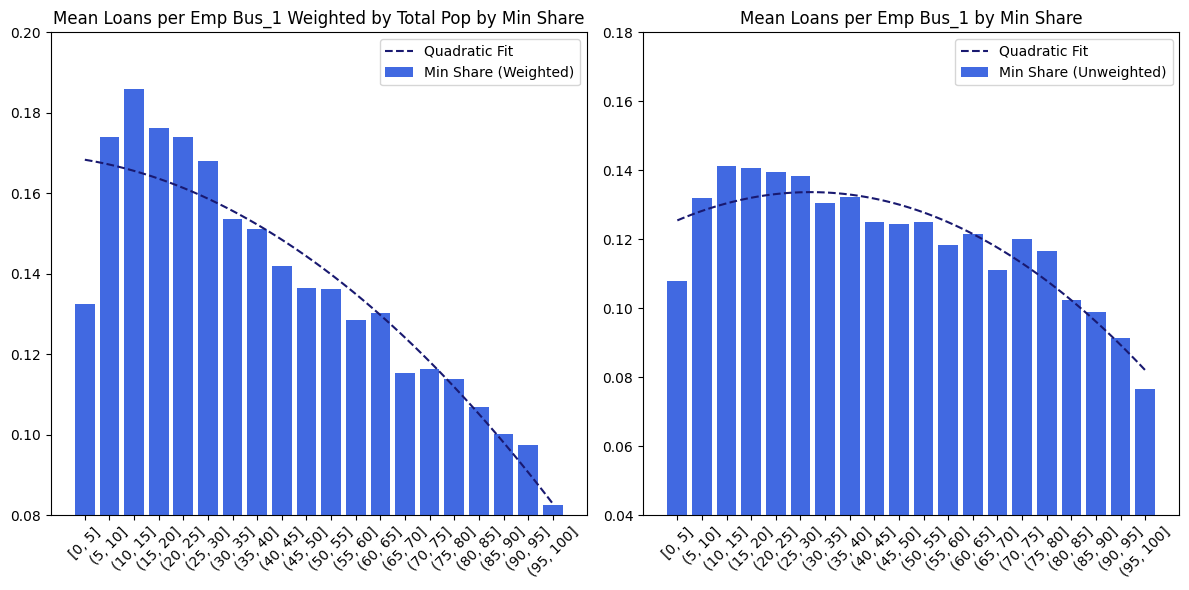

In [46]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_1", "Total Pop", color_col=None, y_limits=[[0.08, 0.2], [0.04, 0.18]])

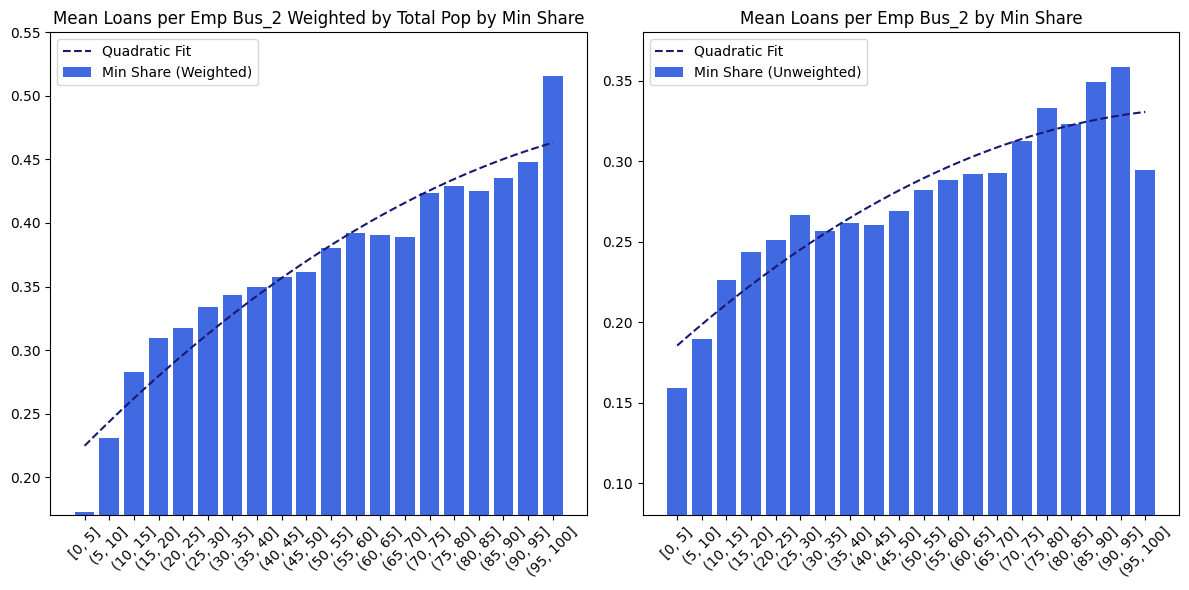

In [47]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_2", "Total Pop", color_col=None, y_limits=[[0.17, 0.55], [0.08, 0.38]])

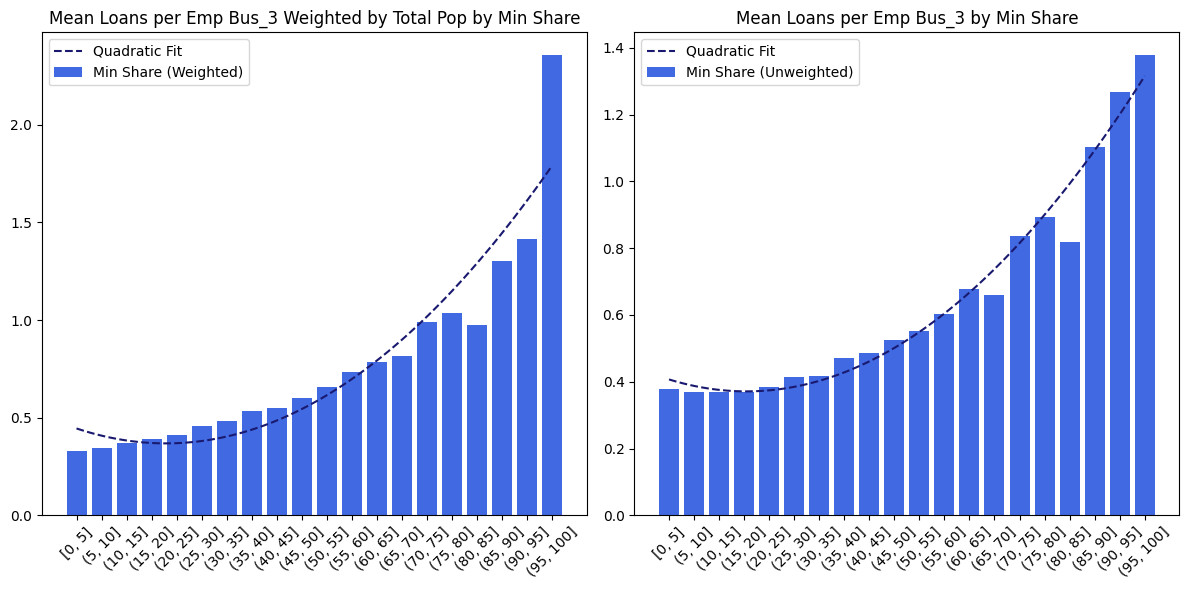

In [48]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_3", "Total Pop", color_col=None, y_limits=None)

In [49]:
def plot_binned_means_lim(df, x_col, y_col, weight_col, color_col=None, y_limits=None):
    # Initialize the figure
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the subplot to a single row with two columns
    
    # Drop NaN values for relevant columns
    columns_to_check = [x_col, y_col, weight_col]
    if color_col is not None:
        columns_to_check.append(color_col)
    df = df.dropna(subset=columns_to_check)
    
    # Define bins based on the specified tick labels
    ticks = list(range(0, 50, 5))  # creates a list [0, 5, 10, ..., 45]
    ticks.append(np.inf)  # appends the maximum value of x_col data
    bin_ranges = pd.IntervalIndex.from_breaks(ticks, closed='left')
    bin_label = f'{x_col} Bin'
    df[bin_label] = pd.cut(df[x_col], bins=bin_ranges)
    
    for j, measure in enumerate(['Weighted', 'Unweighted']):
        ax = axes[j]
        title = f'Mean {y_col}'
        
        if measure == 'Weighted':
            # Calculate weighted mean for each bin
            df['Weighted'] = df[y_col] * df[weight_col]
            grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
            title += f" Weighted by {weight_col}"
        else:
            # Calculate unweighted mean for each bin
            grouped = df.groupby(bin_label)[y_col].mean().reset_index()
        
        bar_colors = 'royalblue'  # default color if not coloring bars
        
        if color_col is not None:
            # Calculate the weighted average of the color column for each bin
            df['WeightedColor'] = df[color_col] * df[weight_col]
            color_grouped = df.groupby(bin_label).apply(lambda x: x['WeightedColor'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted {color_col}')
            
            # Normalize the colors
            cmap = sns.color_palette("coolwarm", as_cmap=True)
            normed_color = (color_grouped[f'Weighted {color_col}'] - color_grouped[f'Weighted {color_col}'].min()) / (color_grouped[f'Weighted {color_col}'].max() - color_grouped[f'Weighted {color_col}'].min())
            bar_colors = cmap(normed_color)
        
        # Create bar charts
        ax.bar(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], color=bar_colors, label=f'{x_col} ({measure})')
        
        # Perform quadratic regression
        x_data = np.arange(len(grouped[bin_label]))
        y_data = grouped[grouped.columns[-1]].values
        coeffs = np.polyfit(x_data, y_data, 2)
        poly_eq = np.poly1d(coeffs)
        x_poly = np.linspace(min(x_data), max(x_data), 100)
        y_poly = poly_eq(x_poly)
        ax.plot(x_poly, y_poly, 'r-', label='Quadratic Fit', color='midnightblue', linestyle="--")
        
        # Set the tick labels
        tick_labels = [str(interval) for interval in bin_ranges]
        tick_labels[-1] = f">{ticks[-2]}"  # replace the last tick label to show >45
        x_data = np.arange(len(tick_labels))  # ensures x_data matches the length of tick_labels
        ax.set_xticks(x_data)
        ax.set_xticklabels(tick_labels, rotation=45)
        
        title += f' by {x_col}'
        ax.set_title(title)
        
        if y_limits:
            ax.set_ylim(y_limits[j])
            
        ax.legend()
    
    plt.tight_layout()
    plt.show()

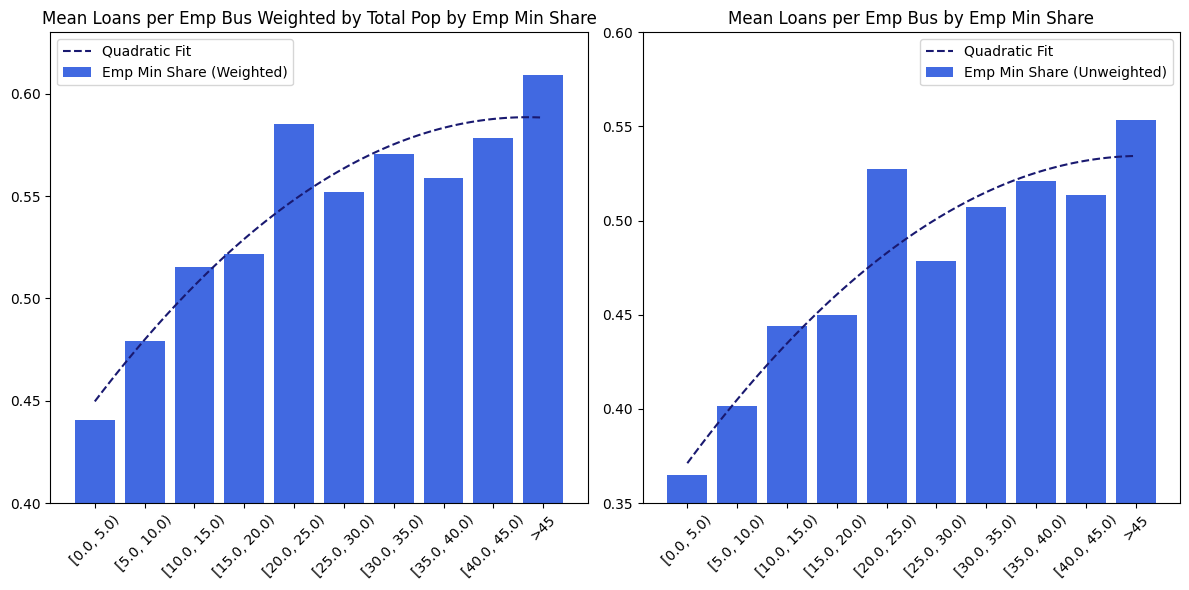

In [50]:
plot_binned_means_lim(stats_df, "Emp Min Share", "Loans per Emp Bus", "Total Pop", color_col=None, y_limits=[[0.4, 0.63], [0.35, 0.60]])

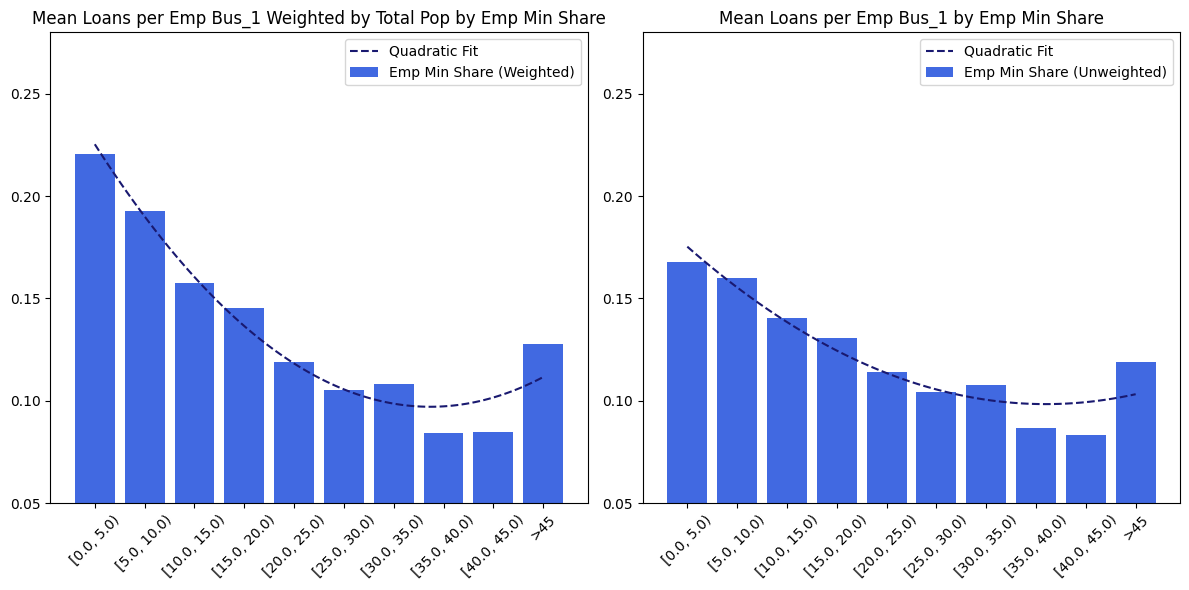

In [51]:
plot_binned_means_lim(stats_df, "Emp Min Share", "Loans per Emp Bus_1", "Total Pop", color_col=None, y_limits=[[0.05, 0.28],[0.05, 0.28]])

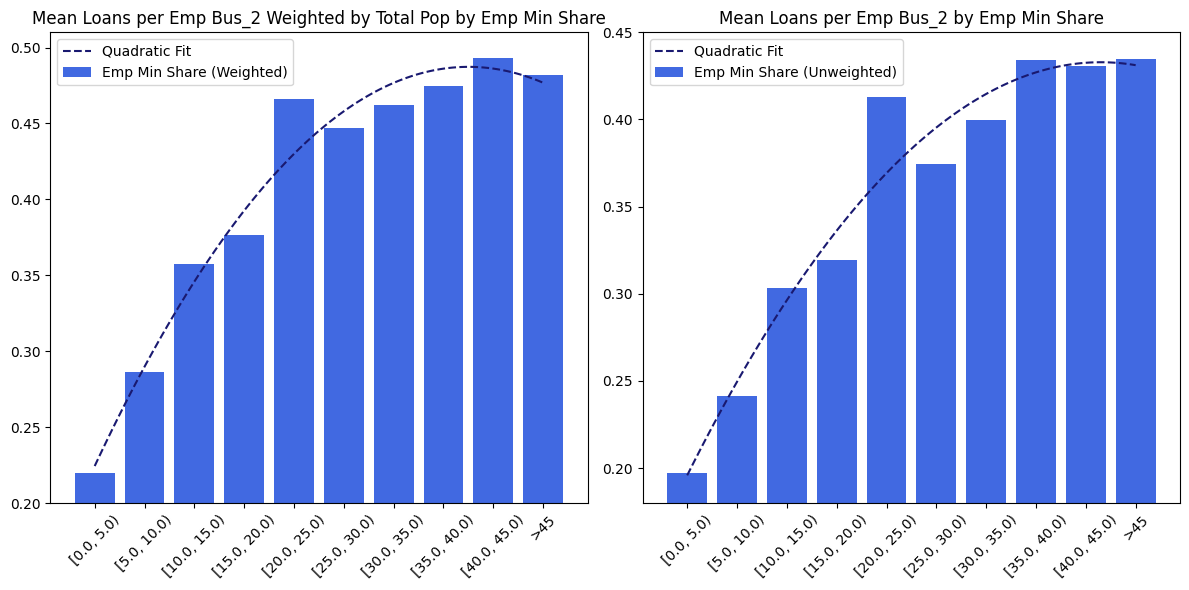

In [52]:
plot_binned_means_lim(stats_df, "Emp Min Share", "Loans per Emp Bus_2", "Total Pop", color_col=None, y_limits=[[0.2,0.51],[0.18,0.45]])

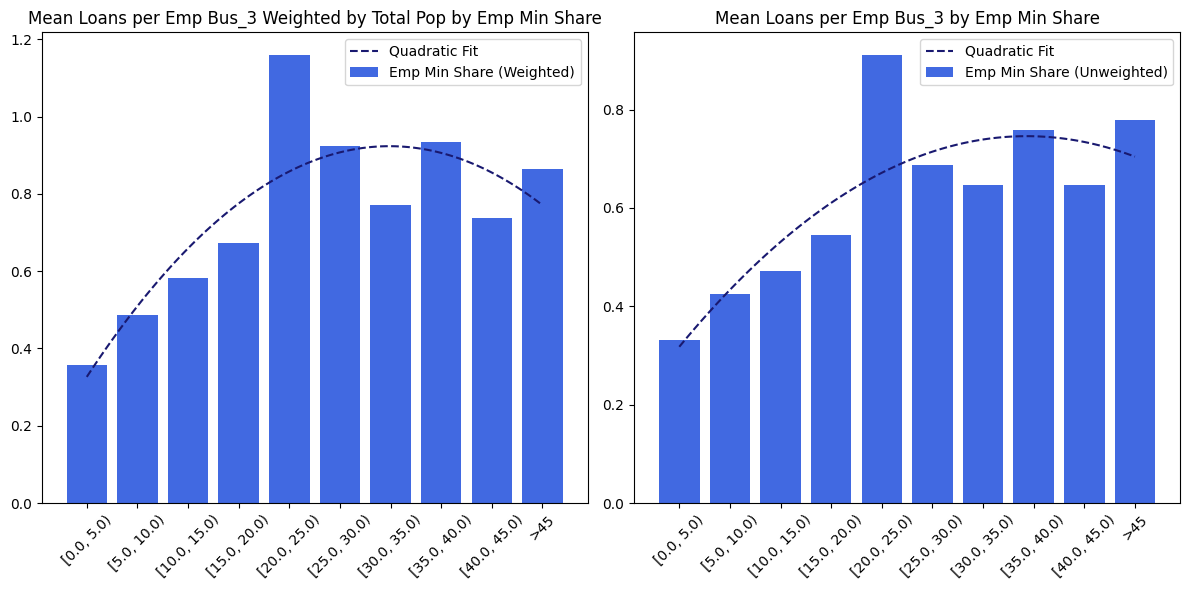

In [53]:
plot_binned_means_lim(stats_df, "Emp Min Share", "Loans per Emp Bus_3", "Total Pop", color_col=None, y_limits=None)

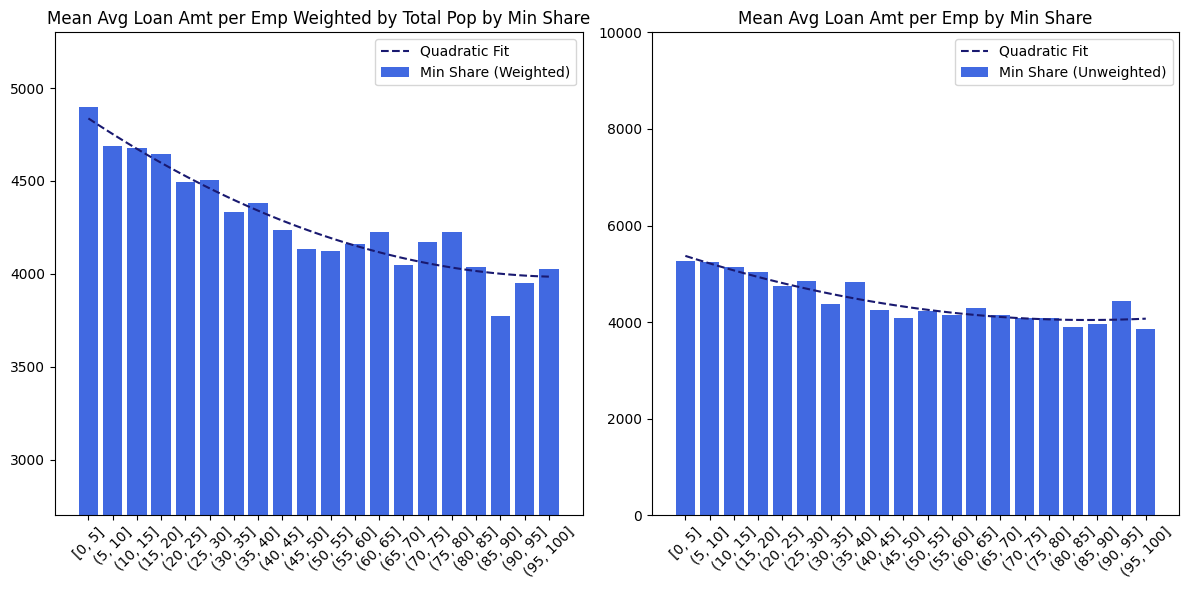

In [54]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp", "Total Pop", color_col=None, y_limits=[[2700, 5300], [0, 10000]])

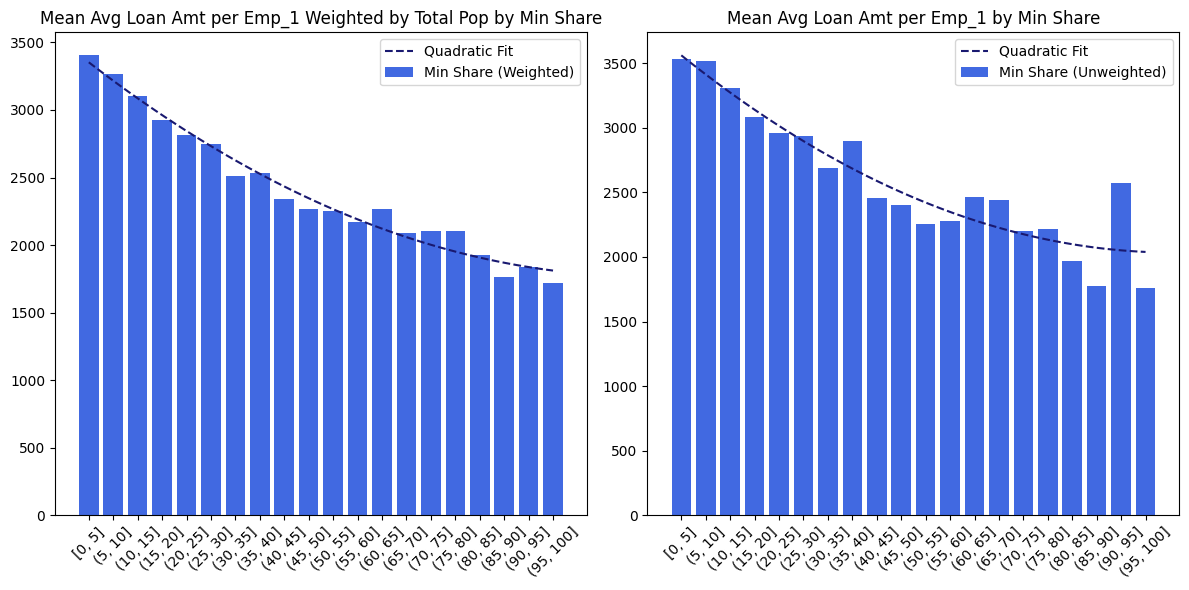

In [55]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_1", "Total Pop", color_col=None, y_limits=None)

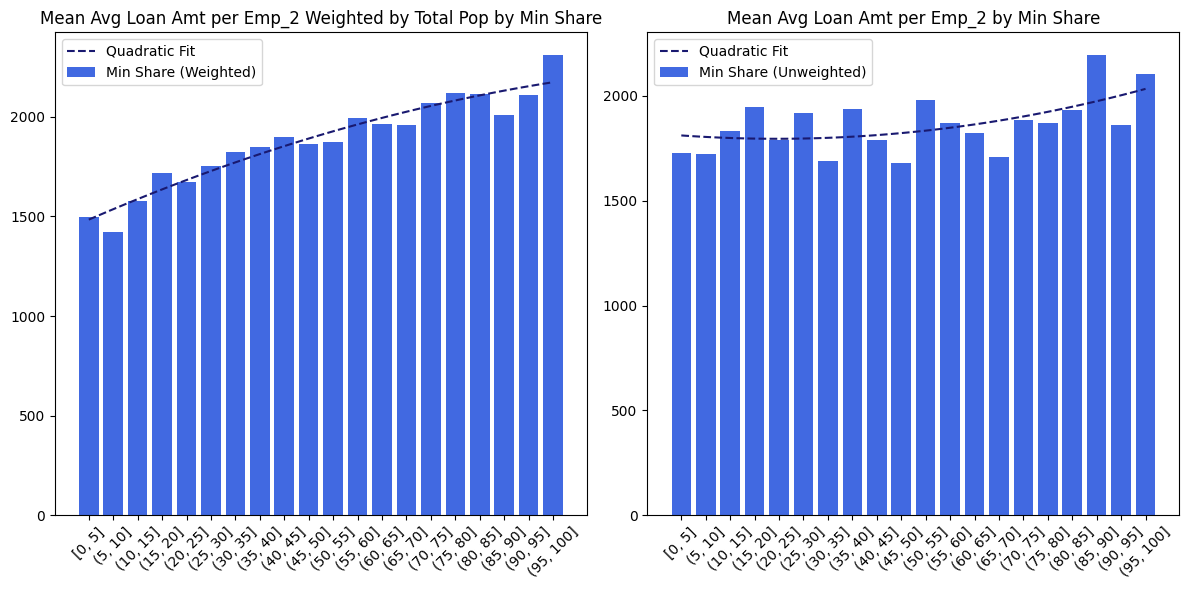

In [56]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_2", "Total Pop", color_col=None, y_limits=None)

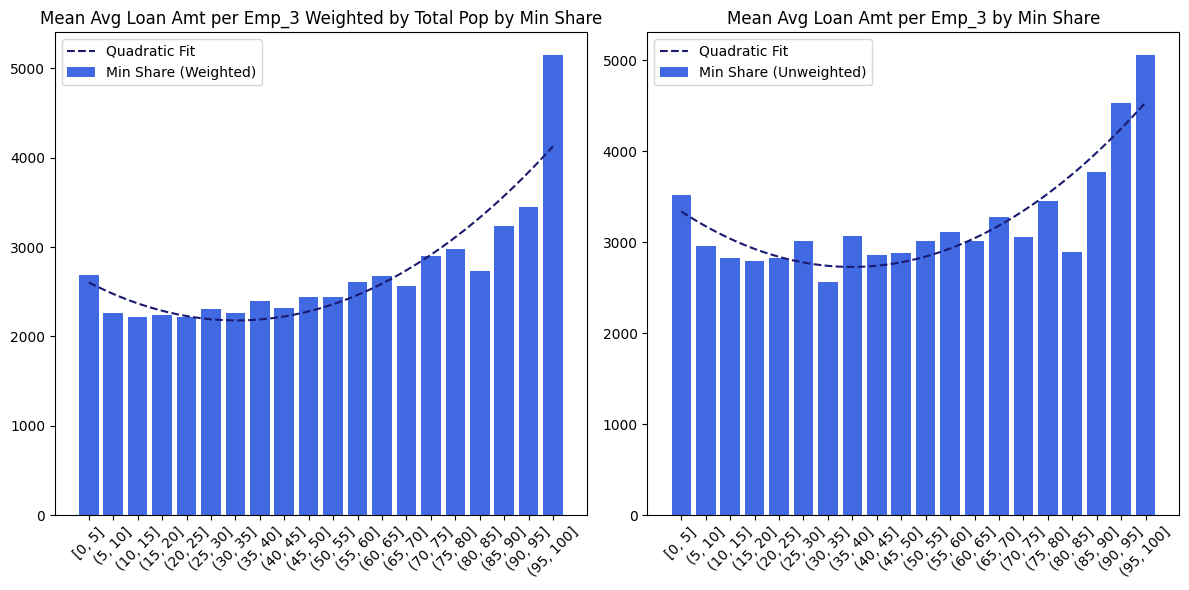

In [57]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_3", "Total Pop", color_col=None, y_limits=None)

In [74]:
def plot_multi_binned_means(df, x_col, y_cols, weight_col, color_col=None, y_limits=None):
    # Initialize the figure
    n = len(y_cols)
    fig, axes = plt.subplots(2, n, figsize=(n * 6, 12))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col])
    if color_col is not None:
        df = df.dropna(subset=[color_col])
    
    for i, y_col in enumerate(y_cols):
        for j, measure in enumerate(['Unweighted', 'Weighted']):
            ax = axes[j, i]
            title  = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            if measure == 'Weighted':
                # Calculate weighted mean for each bin
                df['Weighted'] = df[y_col] * df[weight_col]
                grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
                title += f" Weighted by {weight_col}"
            else:
                # Calculate unweighted mean for each bin
                grouped = df.groupby(bin_label)[y_col].mean().reset_index()
            
            # Calculate the weighted average of the color column for each bin, if color_col is not None
            bar_colors = 'royalblue'  # Default color if color_col is None
            if color_col is not None:
                df['WeightedColor'] = df[color_col] * df[weight_col]
                color_grouped = df.groupby(bin_label).apply(lambda x: x['WeightedColor'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted {color_col}')
                
                # Normalize the colors
                cmap = sns.color_palette("coolwarm", as_cmap=True)
                normed_color = (color_grouped[f'Weighted {color_col}'] - color_grouped[f'Weighted {color_col}'].min()) / (color_grouped[f'Weighted {color_col}'].max() - color_grouped[f'Weighted {color_col}'].min())
                bar_colors = cmap(normed_color)
            
            # Using ax.bar to create bar charts
            ax.bar(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], color=bar_colors, label=f'{x_col} ({measure})')
            
            # Perform quadratic regression
            x_data = np.arange(len(grouped[bin_label]))
            y_data = grouped[grouped.columns[-1]].values
            coeffs = np.polyfit(x_data, y_data, 2)
            poly_eq = np.poly1d(coeffs)
            x_poly = np.linspace(min(x_data), max(x_data), 100)
            y_poly = poly_eq(x_poly)
            ax.plot(x_poly, y_poly, '--', label='Quadratic Fit', color = "midnightblue")
            
            ax.set_xticks(x_data)
            ax.set_xticklabels(grouped[bin_label].astype(str), rotation=45)
            title += f' by {x_col}'
            ax.set_title(title)
            
            if y_limits:
                # Setting different y-limits for unweighted and weighted rows
                ax.set_ylim(y_limits[j])
                
            ax.legend()
    
    plt.tight_layout()
    plt.show()

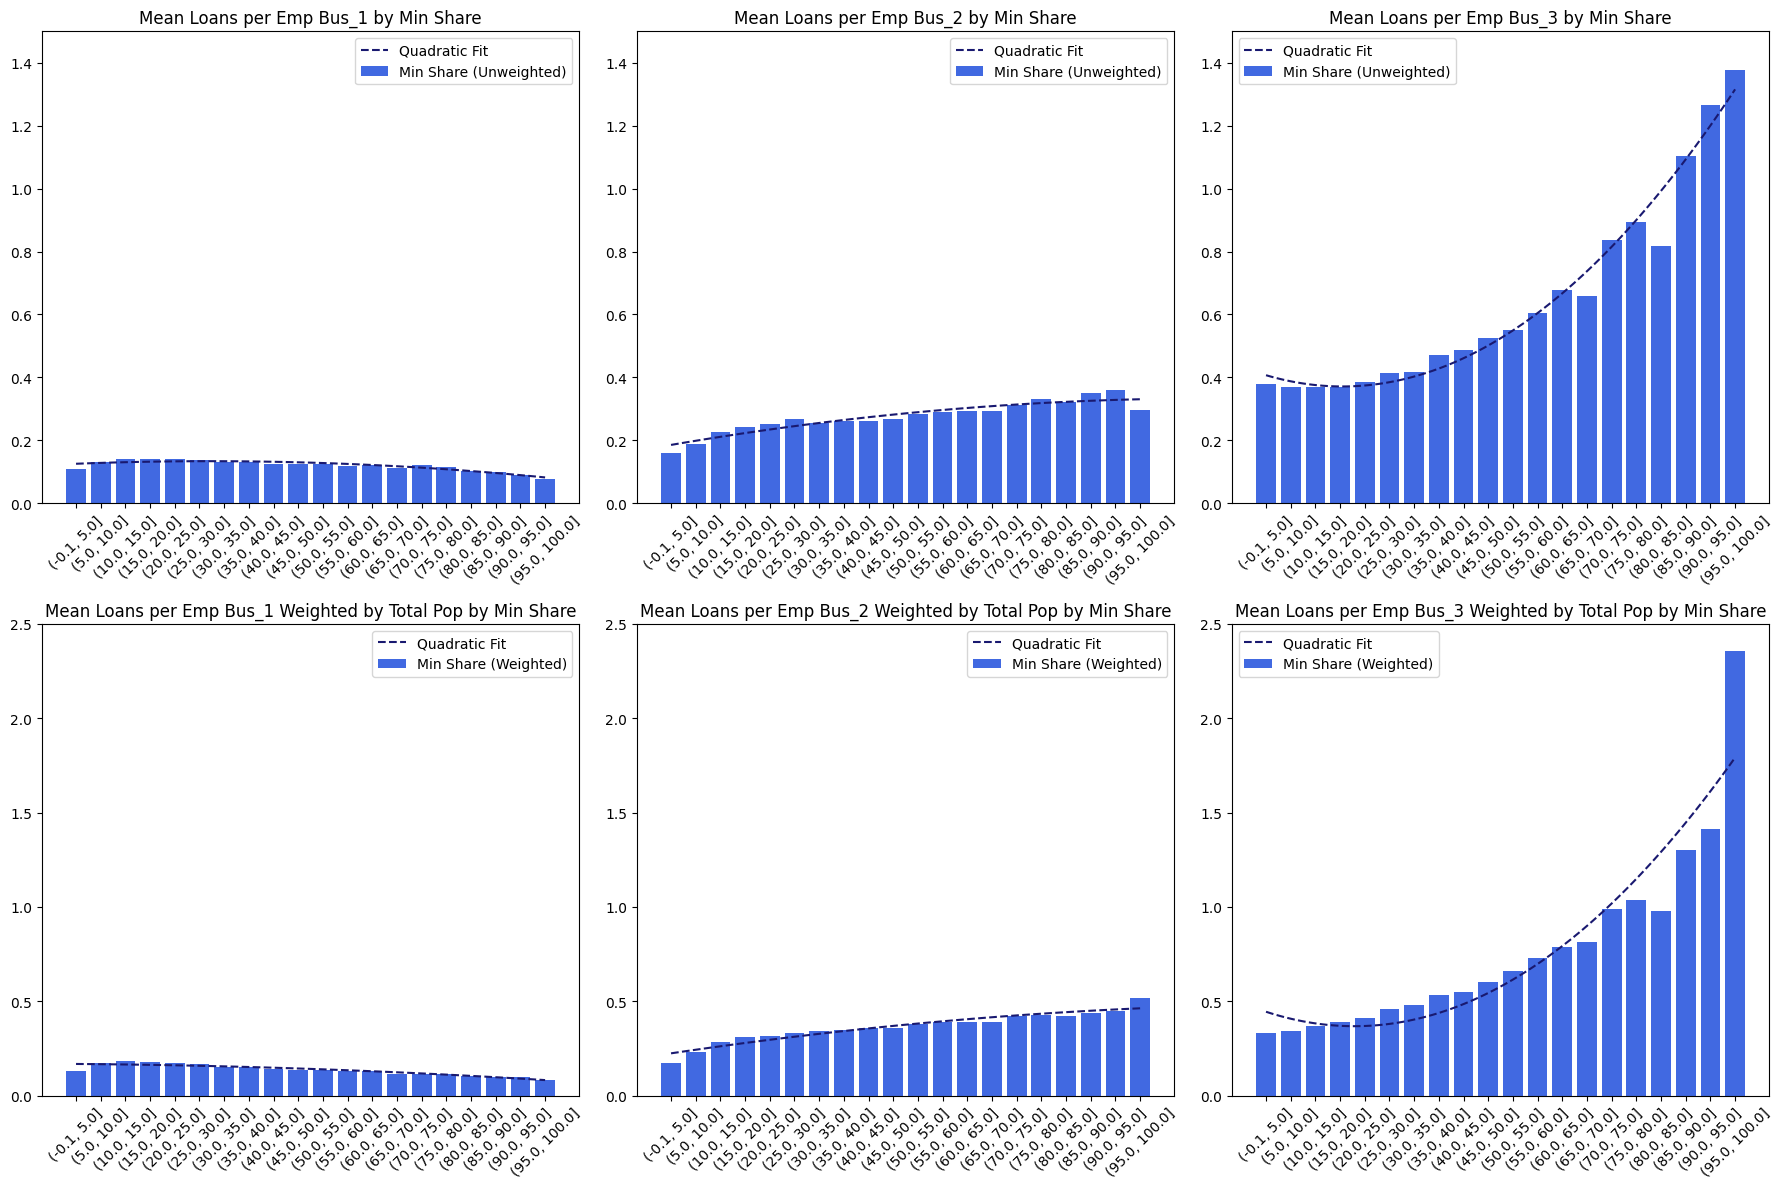

In [75]:
plot_multi_binned_means(stats_df, 'Min Share', ["Loans per Emp Bus_1", 
              "Loans per Emp Bus_2",
              "Loans per Emp Bus_3"], 'Total Pop', color_col=None,y_limits=[[0, 1.5], [0, 2.5]])

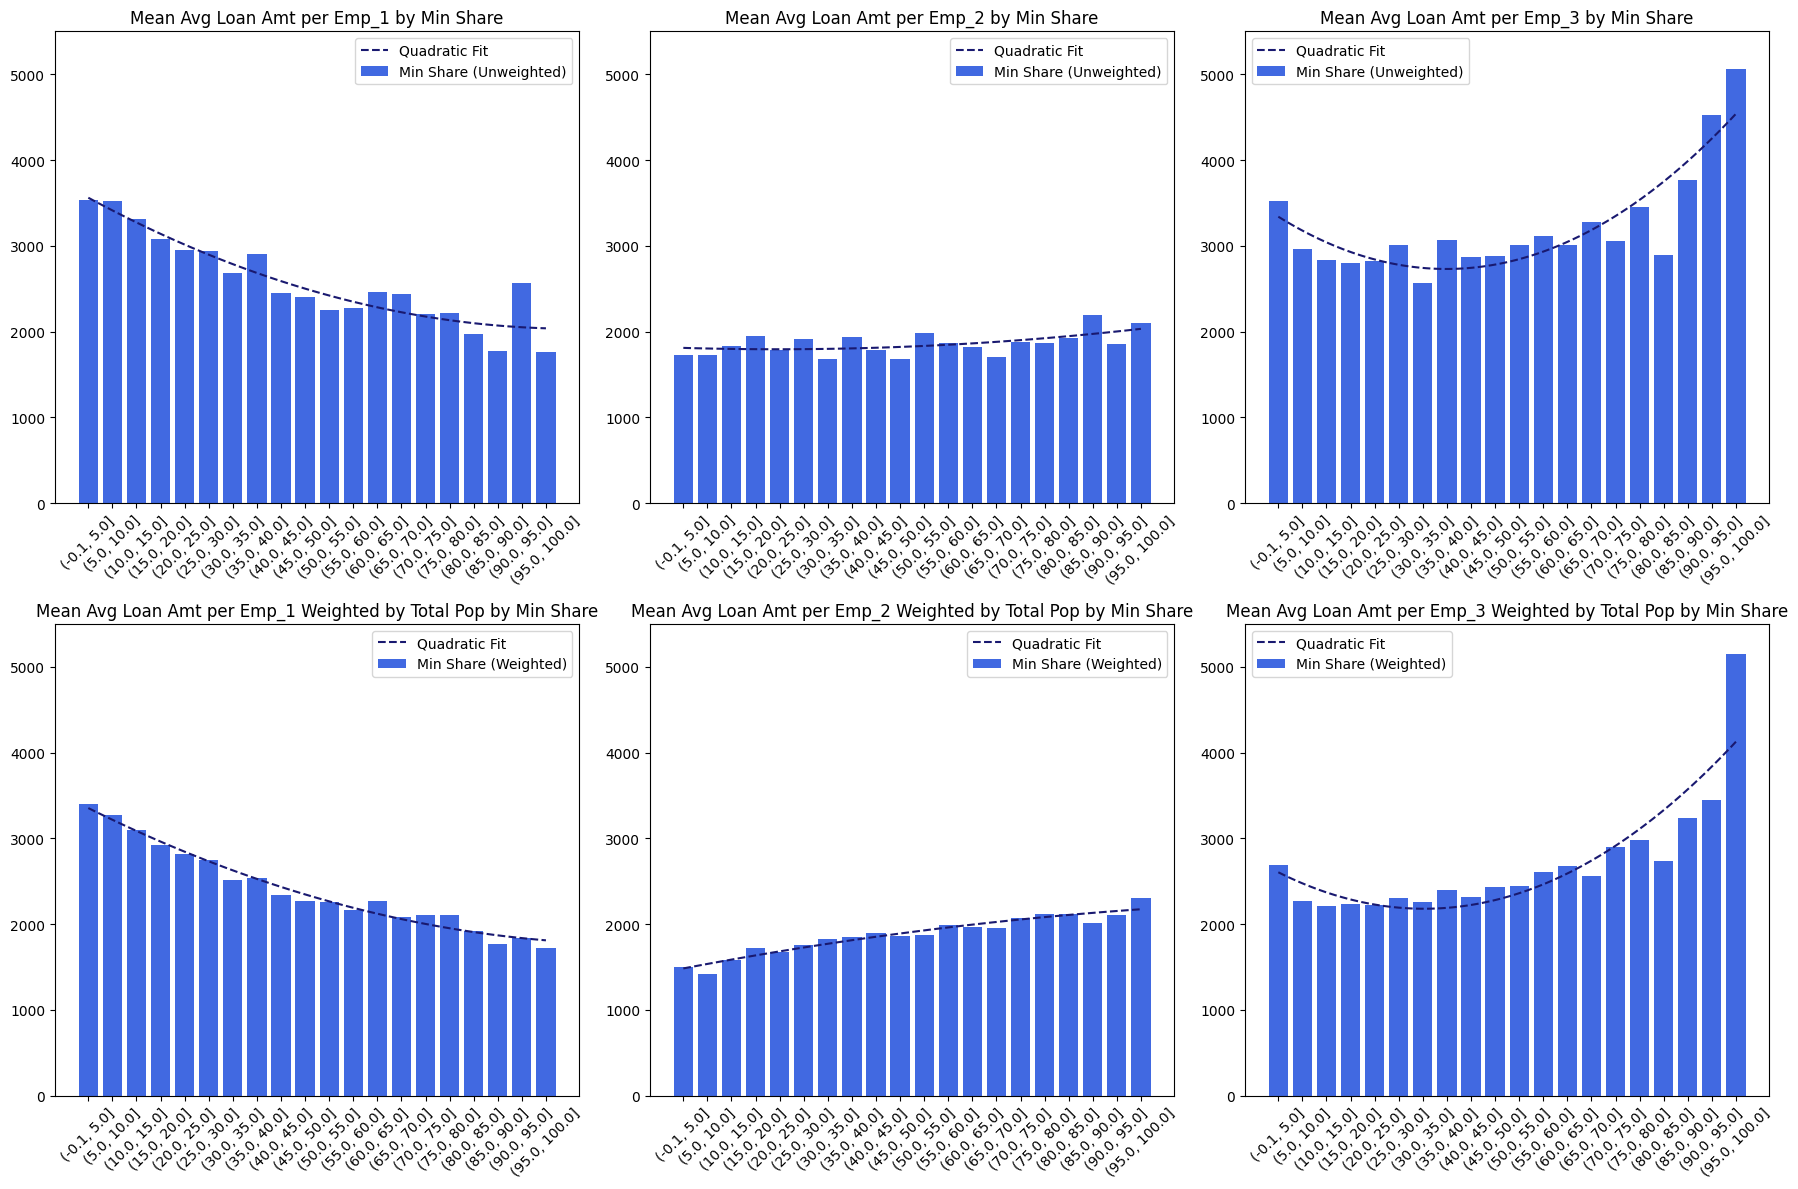

In [77]:
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3'], 'Total Pop', color_col=None,y_limits=[[0,5500],[0,5500]])